In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Retrieve data in the SQL Database

conn = sqlite3.connect('../database/abitmotivation.db')

In [94]:
users_df = pd.read_sql_query("SELECT * FROM users", conn)
objectives_df = pd.read_sql_query("SELECT * FROM objectives", conn)
actions_df = pd.read_sql_query("SELECT * FROM actions", conn)

conn.close()

# Data exploration
## Check actions data

In [95]:
actions_df.head()

   id                   title                                    description  \
0   1  Read SQL Documentation           Study the official SQL documentation   
1   2       Meeting with Team         Discuss project progress with the team   
2   3             Run 5 Miles                              Go for a long run   
3   4       Write Python Code  Work on Python projects for skill improvement   
4   5  Conduct AI Experiments         Perform experiments for research paper   

   importance                                         daysOfWeek  frequency  \
0           4  {"sunday":false,"monday":true,"tuesday":false,...          3   
1           5  {"sunday":false,"monday":false,"tuesday":true,...          1   
2           3  {"sunday":true,"monday":false,"tuesday":true,"...          2   
3           4  {"sunday":true,"monday":true,"tuesday":false,"...          2   
4           5  {"sunday":false,"monday":false,"tuesday":true,...          3   

   difficulty  intendedDuration  realDuratio

In [96]:
actions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 38 non-null     int64  
 1   title              38 non-null     object 
 2   description        38 non-null     object 
 3   importance         38 non-null     int64  
 4   daysOfWeek         38 non-null     object 
 5   frequency          38 non-null     int64  
 6   difficulty         38 non-null     int64  
 7   intendedDuration   38 non-null     int64  
 8   realDuration       16 non-null     float64
 9   comment            32 non-null     object 
 10  author             38 non-null     object 
 11  consistencyStreak  38 non-null     int64  
 12  isGood             38 non-null     int64  
 13  publishedDateTime  38 non-null     int64  
 14  finishedDateTime   16 non-null     float64
 15  objectiveId        38 non-null     object 
dtypes: float64(2), int64(8), obj

## Data visualization on numerical actions data

In [97]:
numeric_columns = ['importance', 'frequency', 'difficulty', 'intendedDuration', 'realDuration', 'consistencyStreak']
summary_stats = actions_df[numeric_columns].describe()
print(summary_stats)

       importance  frequency  difficulty  intendedDuration  realDuration  \
count   38.000000  38.000000   38.000000         38.000000     16.000000   
mean     3.684211   2.447368    2.578947         73.421053     46.562500   
std      0.873182   0.860464    1.030129         30.159604     37.626177   
min      2.000000   1.000000    1.000000         15.000000      0.000000   
25%      3.000000   2.000000    2.000000         60.000000     11.250000   
50%      4.000000   2.000000    2.000000         60.000000     45.000000   
75%      4.000000   3.000000    3.000000         90.000000     75.000000   
max      5.000000   5.000000    5.000000        180.000000    110.000000   

       consistencyStreak  
count          38.000000  
mean            7.131579  
std             3.394519  
min             3.000000  
25%             5.000000  
50%             6.000000  
75%             8.000000  
max            20.000000  


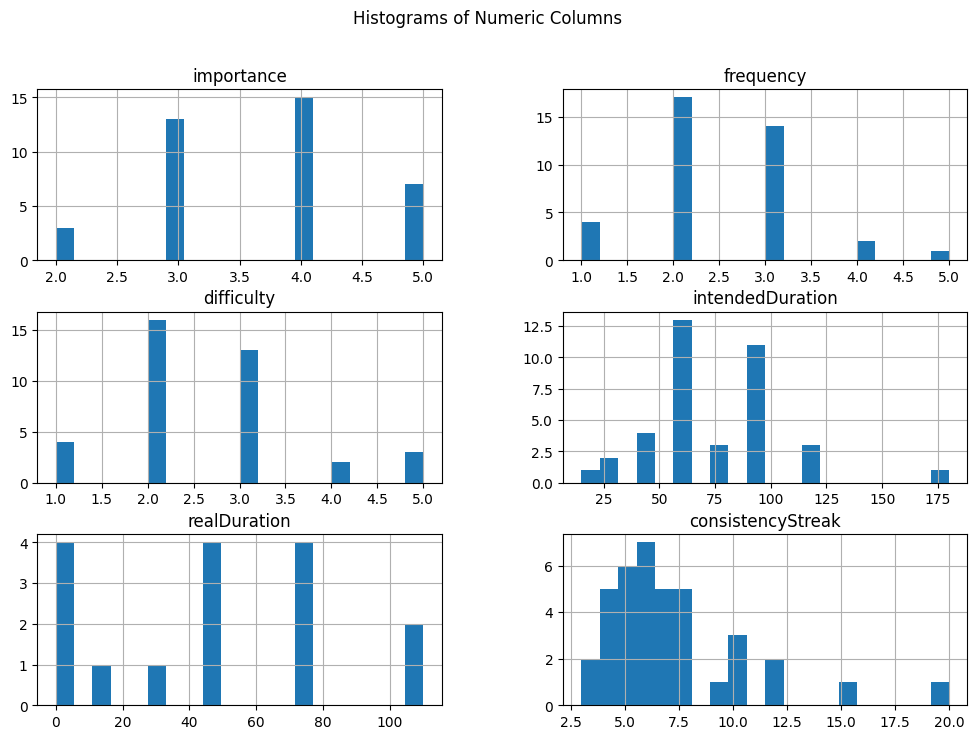

In [98]:
actions_df[numeric_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

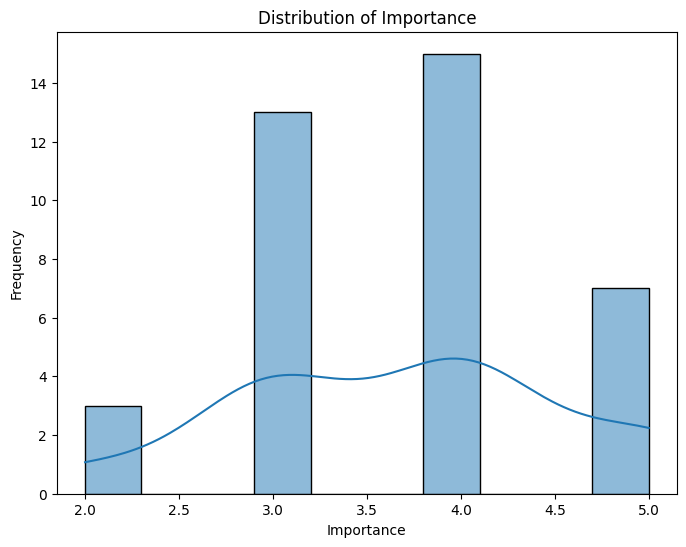

In [99]:
# Histogram of "importance" values
plt.figure(figsize=(8, 6))
sns.histplot(actions_df['importance'], bins=10, kde=True)
plt.title('Distribution of Importance')
plt.xlabel('Importance')
plt.ylabel('Frequency')
plt.show()

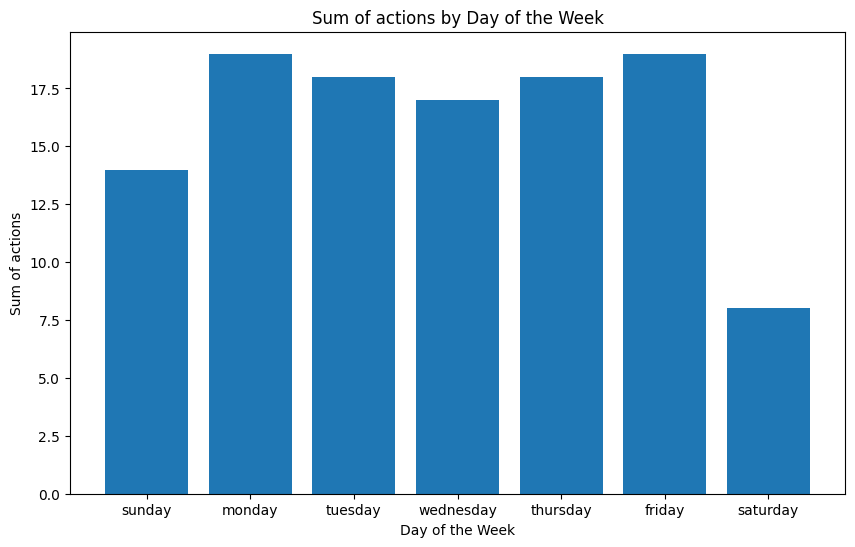

In [100]:
day_names = ["sunday", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday"]

# Create a function to count the number of "true" occurrences for a given day
def count_true_for_day(day):
    return actions_df['daysOfWeek'].apply(lambda x: x.count(f'"{day}":true')).sum()

# Calculate the sum of "true" occurrences for each day
true_counts = [count_true_for_day(day) for day in day_names]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(day_names, true_counts)
plt.title('Sum of actions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sum of actions')
plt.show()

/var/folders/yd/dswgc83100dg171rvl2xx59c0000gn/T/ipykernel_33491/1712140636.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = actions_df.corr()


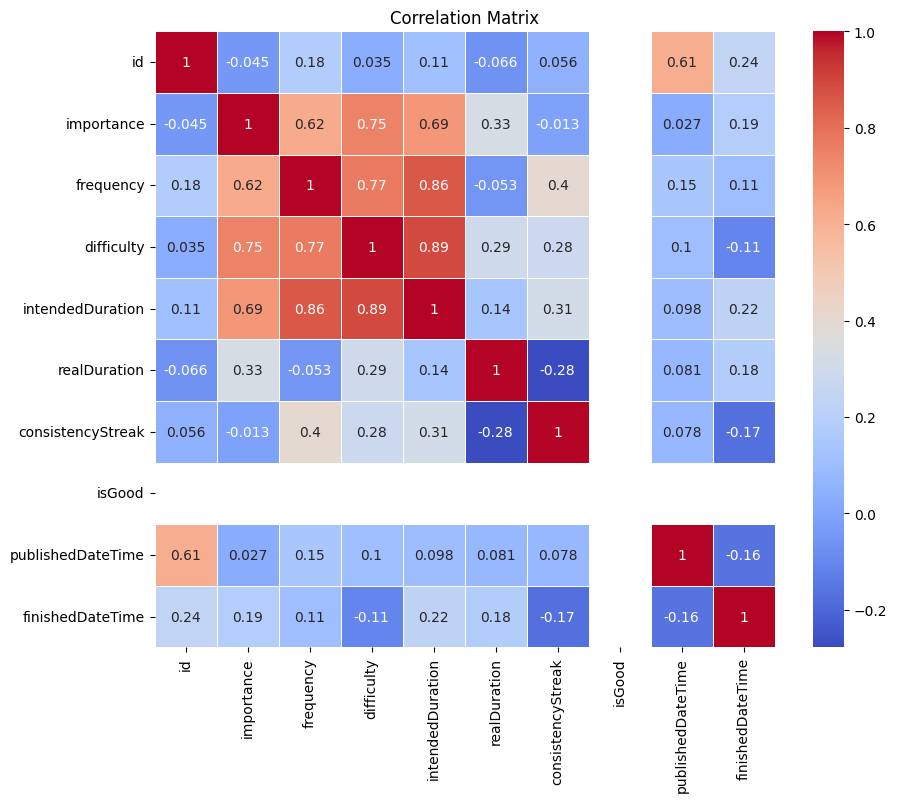

In [101]:
# Calculate the correlation matrix
correlation_matrix = actions_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


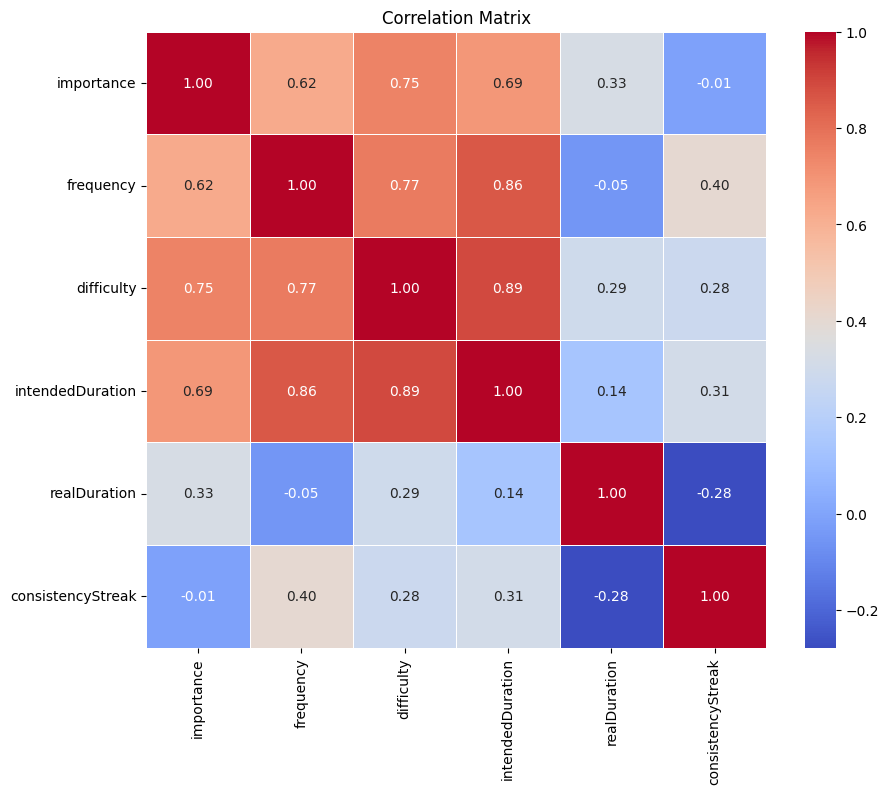

In [102]:
correlation_matrix = actions_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data pre-processing
## Cleaning text data 

In [103]:
import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordisaleilles/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Merge objectives and actions table into one through objective ID

In [104]:
objectives_df.columns = objectives_df.columns.map(lambda x: f"{x}_objective")

In [105]:
merged_df = pd.merge(actions_df, objectives_df, left_on='objectiveId', right_on='id_objective', how='inner')

merged_df.columns

Index(['id', 'title', 'description', 'importance', 'daysOfWeek', 'frequency',
       'difficulty', 'intendedDuration', 'realDuration', 'comment', 'author',
       'consistencyStreak', 'isGood', 'publishedDateTime', 'finishedDateTime',
       'objectiveId', 'id_objective', 'title_objective',
       'description_objective', 'priority_objective', 'complexity_objective',
       'publishedDateTime_objective', 'intendedFinishDateTime_objective',
       'realFinishDateTime_objective', 'author_objective'],
      dtype='object')

### Impute NaN values

In [110]:
merged_df.isna().sum()

id                                  0
title                               0
description                         0
importance                          0
daysOfWeek                          0
frequency                           0
difficulty                          0
intendedDuration                    0
realDuration                        5
comment                             2
author                              0
isGood                              0
publishedDateTime                   0
finishedDateTime                    6
title_objective                     0
description_objective               0
priority_objective                  0
complexity_objective                0
publishedDateTime_objective         0
intendedFinishDateTime_objective    0
realFinishDateTime_objective        1
title_process                       0
dtype: int64

In [111]:
merged_df['comment'] = merged_df['comment'].fillna('')

In [106]:
merged_df = merged_df.drop(columns=['author_objective', 'id_objective', 'consistencyStreak', 'objectiveId'])

In [107]:
merged_df.head()

,id,title,description,importance,daysOfWeek,frequency,difficulty,intendedDuration,realDuration,comment,...,isGood,publishedDateTime,finishedDateTime,title_objective,description_objective,priority_objective,complexity_objective,publishedDateTime_objective,intendedFinishDateTime_objective,realFinishDateTime_objective
0,1,Read SQL Documentation,Study the official SQL documentation,4,"{""sunday"":false,""monday"":true,""tuesday"":false,...",3,2,60,45.0,Good progress!,...,1,1694868025000,1.695041e+12,Learn SQL,Master the basics of SQL,2,3,1695040825000,1695040825000,1.695041e+12
1,34,Finish Chapter 1,Complete the first chapter of the book,3,"{""sunday"":false,""monday"":true,""tuesday"":true,""...",2,2,60,NaN,None,...,1,1694954425000,NaN,Learn SQL,Master the basics of SQL,2,3,1695040825000,1695040825000,1.695041e+12
2,2,Meeting with Team,Discuss project progress with the team,5,"{""sunday"":false,""monday"":false,""tuesday"":true,...",1,4,90,75.0,Productive meeting,...,1,1694868025000,1.695041e+12,Complete Project X,Finish the project on time,1,5,1695040825000,1695040825000,1.695041e+12
3,35,Explore Spanish Culture,Immerse yourself in Spanish culture,4,"{""sunday"":false,""monday"":true,""tuesday"":false,...",2,2,60,NaN,Exciting discoveries,...,1,1694954425000,NaN,Complete Project X,Finish the project on time,1,5,1695040825000,1695040825000,1.695041e+12
4,3,Run 5 Miles,Go for a long run,3,"{""sunday"":true,""monday"":false,""tuesday"":true,""...",2,3,45,45.0,Feeling great!,...,1,1694954425000,1.694868e+12,Exercise Regularly,Stay fit and healthy,3,2,1695040825000,1695040825000,1.695041e+12


In [112]:
merged_df['title_process'] = merged_df['title'].apply(clean_text)
merged_df['description'] = merged_df['description'].apply(clean_text)
merged_df['comment'] = merged_df['comment'].apply(clean_text)
merged_df['title_objective'] = merged_df['title_objective'].apply(clean_text)
merged_df['description_objective'] = merged_df['description_objective'].apply(clean_text)

merged_df['realDuration'].fillna(merged_df['intendedDuration'], inplace=True)

### Label encode the authors

In [113]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

merged_df['author'] = label_encoder.fit_transform(merged_df['author'])

### Encode daysOfWeek
Add 7 columns represented by the days of the week, where it indicates if the actions is programmed to a certain day.
And remove daysOfWeek column, it won't be used again

In [115]:
import json

def parse_days_of_week(json_str):
    return json.loads(json_str.replace('false', 'false').replace('true', 'true'))

merged_df['daysOfWeek'] = merged_df['daysOfWeek'].apply(parse_days_of_week)

days = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
for day in days:
    merged_df[day] = merged_df['daysOfWeek'].apply(lambda x: x[day])

In [116]:
merged_df.drop('daysOfWeek', axis=1, inplace=True)

### Transform text data to TFIDF


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_data = tfidf_vectorizer.fit_transform(merged_df['title_process'] + ' ' + merged_df['description'] + ' ' + merged_df['comment'] + ' ' + merged_df['title_objective'] + ' ' + merged_df['description_objective'])

tfidf_df = pd.DataFrame(tfidf_data.toarray(), columns=tfidf_vectorizer.get_feature_names_out(input_features=merged_df['title']))

merged_df = pd.concat([merged_df, tfidf_df], axis=1)


### Get the cosine similarity between data

In [118]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(tfidf_data, tfidf_data)


### Encode numerical columns using Standard Scaler

In [119]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['importance', 'frequency', 'difficulty', 'intendedDuration', 'realDuration', 'priority_objective', 'complexity_objective']
scaler = StandardScaler()
merged_df[numerical_columns] = scaler.fit_transform(merged_df[numerical_columns])


### Last cleaning, removing unnused columns

In [120]:
merged_df = merged_df.drop(columns=['publishedDateTime_objective', 'intendedFinishDateTime_objective', 'realFinishDateTime_objective', 'publishedDateTime'])

### Merge Text and Numrical pre-processed columns

In [121]:
user_profiles = pd.concat([pd.DataFrame(tfidf_data.toarray()), merged_df[numerical_columns]], axis=1)

# Recommendation model
## Use Similarity scores to get atleast 5 recommended actions

In [122]:
def hybrid_recommend(index, user_profiles, similarities, num_recommendations=5):
    similarity_scores = list(enumerate(similarities[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    similar_indices = [i for i, _ in similarity_scores if i != index]
    
    return similar_indices[:num_recommendations]

In [123]:
input_document_index = 0
recommended_indices = hybrid_recommend(input_document_index, user_profiles, similarities)

print("Recommended Documents:")
for idx in recommended_indices:
    print(f"Title: {merged_df['title'][idx]}, ID: {merged_df['id'][idx]}")


Recommended Documents:
Title: Finish Chapter 1, ID: 34
Title: Write Python Code, ID: 4
Title: Meeting with Team, ID: 2
Title: Achieve Fitness Milestone, ID: 37
Title: Complete JavaScript Project, ID: 30
